In [68]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pymc as pm
import arviz as az

In [69]:
# data = [1, 0, 0, 0, 1, 0, 1, 0, 0, 0]

np.random.seed(43)
trials = 150
random_result = np.random.choice([1,2,3,4,5,6], size = trials)
dice_bias = 0.26  # unknown value in a real experiment
#data = stats.bernoulli.rvs(p=theta_real, size=trials)
data = stats.binom.rvs(n=1, p=dice_bias, size=trials)
no_of_sixes = np.sum(random_result== 6)
print (random_result)
#print (data)
print ("------------",no_of_sixes)
print ("Data type is " ,type(data))


[5 1 2 6 3 1 4 2 4 4 3 1 4 3 4 4 2 2 3 4 3 4 6 5 5 1 6 5 1 5 1 3 5 1 2 3 1
 5 5 1 5 2 6 5 1 6 1 4 3 2 4 2 6 1 3 3 6 6 6 1 3 4 3 6 4 4 3 3 5 3 4 4 1 4
 6 5 5 6 4 6 4 1 4 6 4 3 2 1 1 5 6 5 4 2 4 2 6 6 1 1 4 2 5 5 4 2 5 6 1 5 5
 5 4 3 2 1 4 1 2 1 2 4 5 6 5 6 3 1 1 4 5 3 3 5 5 4 2 5 3 3 5 3 2 4 5 6 6 1
 4 5]
------------ 22
Data type is  <class 'numpy.ndarray'>


In [66]:

with pm.Model() as model_uniform:
    # Prior for the probability of rolling a '6'
    prior1 = pm.Uniform('uniform',1 , 6)
    
    # likelihood 
    likelihood = pm.Binomial('y', p=0.16, n=150, observed=random_result)
    #likelihood = pm.Categorical('likelihood', p=1, observed= random_result)
    
with model_uniform:
    trace = pm.sample(2000)
    # sample posterior


    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [uniform]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 55 seconds.


array([[<Axes: title={'center': 'uniform'}>,
        <Axes: title={'center': 'uniform'}>]], dtype=object)

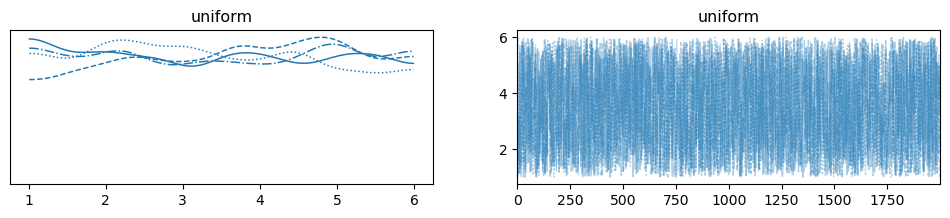

In [51]:
az.plot_trace(trace)

<Axes: title={'center': 'uniform'}>

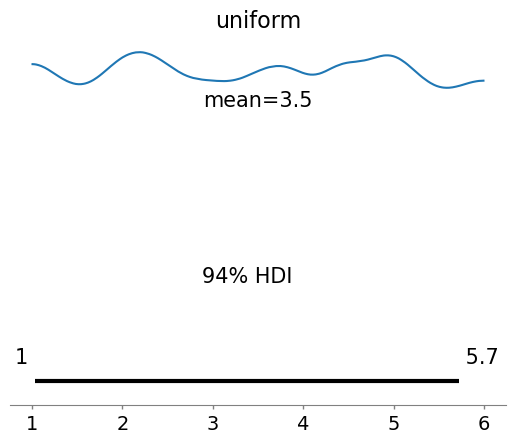

In [52]:
az.plot_posterior(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 54 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 53 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 53 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 56 seconds.


<Axes: title={'center': 'b1'}>

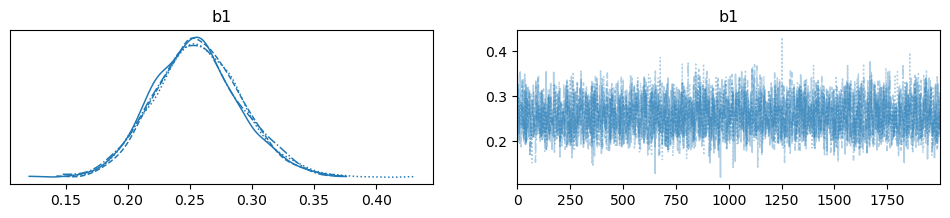

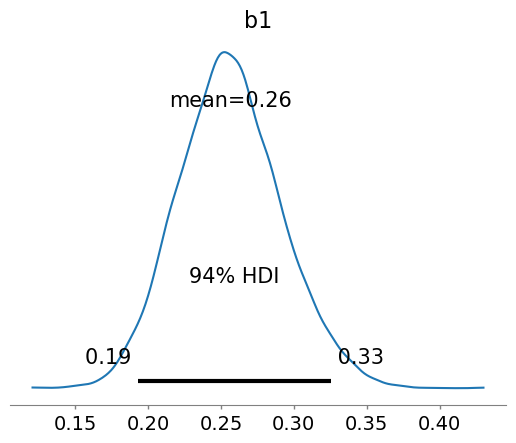

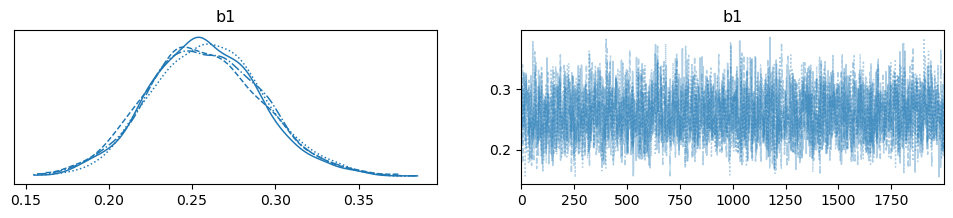

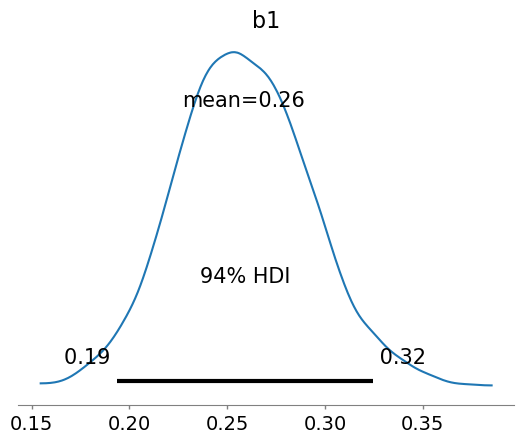

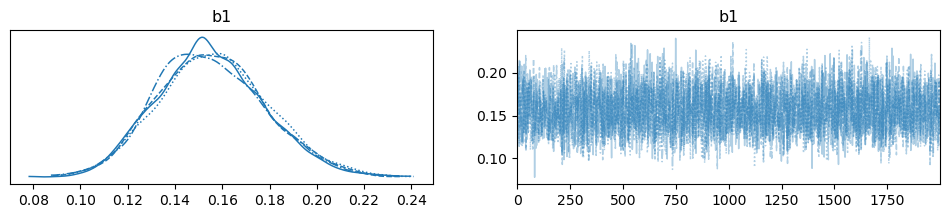

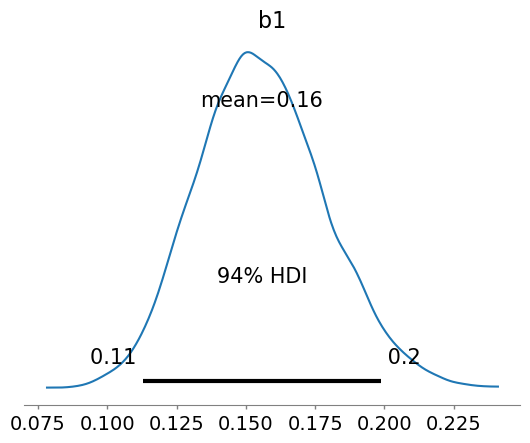

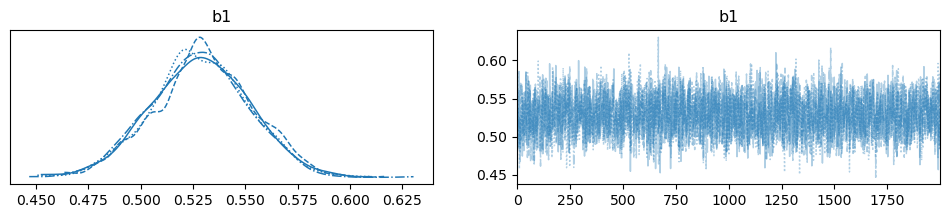

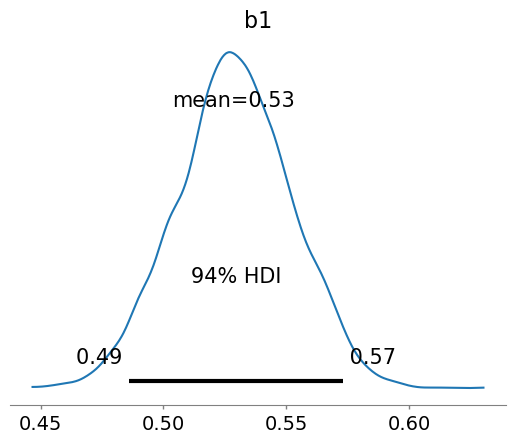

In [72]:
# -----------------------  BETA MODEL 1 ------------------

with pm.Model() as model_beta:
    # Prior for the probability of rolling a '6'
    b1 = pm.Beta(name = 'b1',alpha = 1 , beta = 1)
    
    # likelihood 
    y = pm.Binomial('y', p=b1, n=1, observed=data)
    
    
with model_beta:
    # sample posterior
    trace = pm.sample(2000)
az.plot_trace(trace)
az.plot_posterior(trace)

# -----------------------  BETA MODEL 2 ------------------

with pm.Model() as model_beta1:
    # Prior for the probability of rolling a '6'
    b1 = pm.Beta(name = 'b1',alpha = 2 , beta = 3)
    
    # likelihood 
    y = pm.Binomial('y', p=b1, n=1, observed=data)
    
    
with model_beta1:
    # sample posterior
    trace = pm.sample(2000)
az.plot_trace(trace)
az.plot_posterior(trace)

# -----------------------  BETA MODEL 3 ------------------

with pm.Model() as model_beta2:
    # Prior for the probability of rolling a '6'
    b1 = pm.Beta(name = 'b1',alpha = 1 , beta = 100)
    
    # likelihood 
    y = pm.Binomial('y', p=b1, n=1, observed=data)
    
    
with model_beta2:
    # sample posterior
    trace = pm.sample(2000)
az.plot_trace(trace)
az.plot_posterior(trace)

# -----------------------  BETA MODEL 4 ------------------

with pm.Model() as model_beta3:
    # Prior for the probability of rolling a '6'
    b1 = pm.Beta(name = 'b1',alpha = 200 , beta = 100)
    
    # likelihood 
    y = pm.Binomial('y', p=b1, n=1, observed=data)
    
    
with model_beta3:
    # sample posterior
    trace = pm.sample(2000)
az.plot_trace(trace)
az.plot_posterior(trace)


hello


<Axes: title={'center': 'b1'}>

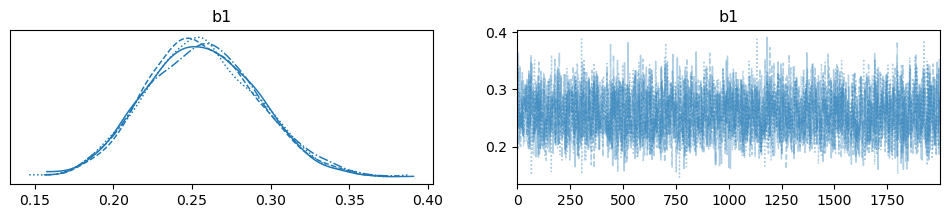

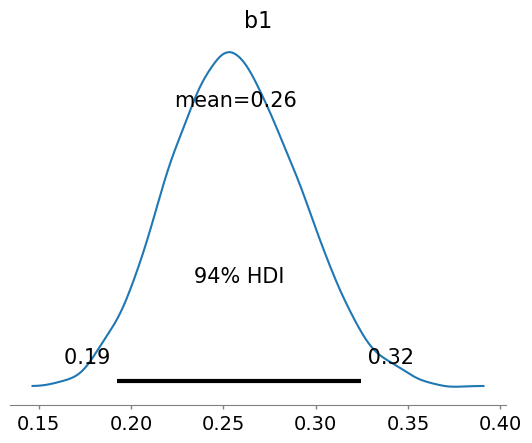